In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing packages

In [11]:
my_data=pd.read_csv("/content/TestParam.csv")   # reading file

In [12]:
my_data.shape              # looking for no of rows and columns

(42000, 785)

In [13]:
my_data["label"].value_counts()    # count of each class 
                                   # we can see that data is almost balanced

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [14]:
X=my_data.drop("label",axis=1)

In [15]:
X.shape

(42000, 784)

In [16]:
Y=my_data["label"]

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)                 #standarization of independent variables


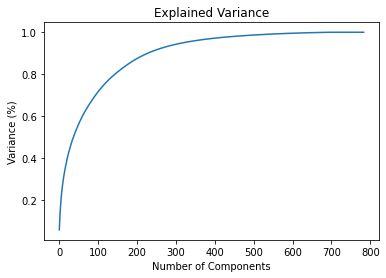

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')                    #for each component                       
plt.title('Explained Variance')                                    
plt.show()

In [19]:
pca=PCA(n_components=200)                        #when we have 200 components, almost 90% data is explained 

In [20]:
principalComponent=pca.fit_transform(scaled_data)

In [24]:
principalComponent[0]

array([-5.14047769, -5.22644554,  3.88700109, -0.90151249,  4.92911121,
        2.0354128 ,  4.70694983, -4.76718415,  0.23095121, -1.46095647,
        0.83041461,  3.80980849, -2.11192415, -4.31089397, -0.90822871,
        3.59742846,  1.26709215,  1.34582477, -0.40579362, -1.36358319,
       -2.21275925, -1.2822518 , -1.39087126, -1.03322128,  2.45074796,
       -0.02550208,  0.54368496, -2.18128706,  1.11491984, -0.49766509,
       -2.64843279, -1.08869281, -1.10410417, -0.38312602,  1.41476923,
       -0.21177515, -0.07483408,  0.61987161,  1.81001963, -0.32891858,
       -0.96525999,  1.40911158,  0.99579375, -0.73335408,  0.65924813,
       -0.55183703, -1.44562265, -0.43186224,  1.49136915, -0.01121291,
       -0.35624481,  0.37290531,  1.31803007, -0.70518722, -1.0505233 ,
        0.0370443 , -1.8882442 , -2.37318997, -2.25619875, -0.29046022,
        0.6499518 ,  0.63972665, -0.84692906,  0.76797357,  0.33646796,
       -0.78108197,  1.1620238 ,  0.90504515, -0.20957453, -0.66

In [33]:
pc_names=[]          #generating for columns names

In [34]:
for i in range(1,201):
     pc_names.append("PC_"+str(i))

In [36]:
pc_names[:10]

['PC_1',
 'PC_2',
 'PC_3',
 'PC_4',
 'PC_5',
 'PC_6',
 'PC_7',
 'PC_8',
 'PC_9',
 'PC_10']

In [37]:
len(pc_names)

200

In [39]:
princiapal_DF=pd.DataFrame(principalComponent,columns=pc_names)

In [41]:
princiapal_DF.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,...,PC_161,PC_162,PC_163,PC_164,PC_165,PC_166,PC_167,PC_168,PC_169,PC_170,PC_171,PC_172,PC_173,PC_174,PC_175,PC_176,PC_177,PC_178,PC_179,PC_180,PC_181,PC_182,PC_183,PC_184,PC_185,PC_186,PC_187,PC_188,PC_189,PC_190,PC_191,PC_192,PC_193,PC_194,PC_195,PC_196,PC_197,PC_198,PC_199,PC_200
0,-5.140478,-5.226446,3.887001,-0.901512,4.929111,2.035413,4.706950,-4.767184,0.230951,-1.460956,0.830415,3.809808,-2.111924,-4.310894,-0.908229,3.597428,1.267092,1.345825,-0.405794,-1.363583,-2.212759,-1.282252,-1.390871,-1.033221,2.450748,-0.025502,0.543685,-2.181287,1.114920,-0.497665,-2.648433,-1.088693,-1.104104,-0.383126,1.414769,-0.211775,-0.074834,0.619872,1.810020,-0.328919,...,0.456862,0.055932,-0.132506,-0.595398,-0.192509,0.341091,0.310055,0.138256,0.810318,-0.443530,-0.344634,0.397471,0.697965,-0.140903,0.008297,0.125100,0.539778,-0.462843,-1.105565,-0.291410,0.091230,-0.193764,0.078474,-0.779617,-0.347442,-0.008334,0.014052,0.371220,0.066847,-0.377000,0.978293,-0.022771,-0.280174,-0.191817,0.713880,-0.261130,-0.461733,-0.100928,0.322060,-0.547678
1,19.292332,6.032996,1.308148,-2.383294,3.095189,-1.791094,-3.772790,0.153869,-4.115197,-4.299364,-4.526438,-0.701414,-1.090901,-3.032524,2.555376,0.583196,-3.151510,-3.811024,0.078071,-0.228879,-2.413456,-3.396983,-0.212322,0.220759,-0.624162,-4.191231,0.001137,0.070200,-0.246624,-1.784122,-0.126375,1.831312,3.056205,2.459418,-1.526616,1.065728,1.763470,-1.104716,-0.601855,-1.160511,...,0.240963,0.029974,0.106689,-0.250469,-0.086173,0.002298,-0.136289,-1.016915,0.970294,0.402158,0.019761,-0.009229,0.461209,0.444628,-0.143346,0.065596,0.213230,-0.016771,0.252140,-0.857107,0.557737,-0.183574,-0.759952,0.644040,-0.170341,-0.440342,-1.024025,1.162983,-0.236436,0.552416,-0.387568,0.315384,0.097433,-0.756717,-0.407514,0.184520,0.389100,0.856775,0.371129,-0.772699
2,-7.644503,-1.705813,2.289326,2.241135,5.094427,-4.152059,-1.012004,1.732554,0.436270,-0.073692,-0.707135,-3.006445,0.869842,3.171893,2.226066,0.358538,-1.009902,-0.524090,-0.084917,0.962156,-0.563247,-0.925740,2.307781,1.882174,-2.069906,-0.594096,1.129704,-1.538676,0.584119,0.248833,-1.188419,0.629516,0.692894,-0.141785,-0.983577,0.473735,0.512703,-0.886638,0.941463,0.034059,...,-0.018689,0.133161,0.044635,-0.408531,0.054096,0.436831,0.157045,0.060413,0.041751,0.077160,0.481959,-0.441852,-0.045678,-0.539753,0.375301,-0.180537,-0.288583,-0.021802,0.007309,-0.598168,-0.075057,-0.085429,-0.474143,0.292568,0.058487,-0.089641,-0.854064,0.253960,-0.544272,0.204654,-0.343227,0.308473,-0.097006,0.360965,-0.121962,0.384673,0.182913,0.442772,-0.245282,0.475011
3,-0.474207,5.836139,2.008618,4.271106,2.377778,2.179914,4.398037,-0.353695,0.992293,5.501278,-4.482106,-2.991885,-0.959480,-1.853567,-2.932762,0.048570,0.069510,-0.057158,1.405645,-1.787950,-2.044338,1.099810,0.531572,0.489240,3.446991,-1.623806,0.844953,0.505674,0.655825,0.780244,1.172093,-0.913248,-1.483287,0.385389,1.150849,-1.113253,-2.177742,0.822759,0.227401,-1.950062,...,0.532642,0.588633,0.228420,-0.877055,0.089760,1.045525,-0.237881,1.130286,-0.827436,-0.815957,0.190653,-0.133123,-0.109225,0.586563,0.453294,-0.209944,0.034618,0.491224,0.446110,0.383313,-1.055864,0.172884,1.562939,-0.016322,0.065574,0.979929,0.531078,-0.049592,0.194955,-0.965447,-1.298393,0.686885,-1.134283,-0.853522,1.068526,0.561612,-0.747747,1.321105,-0.256341,1.146168
4,26.559574,6.024818,0.933179,-3.012644,9.489179,-2.331193,-6.149599,-1.783634,-4.123301,-5.757377,0.034255,-0.532194,-0.313996,-2.497789,1.776794,0.980336,-0.505054,-2.023440,-0.018845,-1.043433,0.984273,0.842651,-0.868806,0.167547,-2.810175,-3.380659,1.239005,0.041720,-1.487658,-0.685833,1.310964,1.324531,2.275151,0.624661,-1.303691,2.653316,1.554697,-0.619861,-0.646480,-0.811807,...,0.273036,0.249601,-0.864568,-0.83

In [42]:
princiapal_DF.shape

(42000, 200)

In [45]:
Final_DF=pd.concat([princiapal_DF,Y],axis=1)        #combining x and y variables and make a new data frame

In [47]:
Final_DF.label

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [48]:
X=Final_DF.drop("label",axis=1)

In [49]:
X.shape

(42000, 200)

In [50]:
Y=Final_DF["label"]

In [51]:
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30,random_state=123)

In [52]:
X_train.shape

(29400, 200)

In [54]:
y_test.shape

(12600,)

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression( multi_class='multinomial',solver='newton-cg')
                               #one vs rest implementation using logistic regression

In [64]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
Y_pred = logreg.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm = confusion_matrix(y_test, Y_pred)
print(cfm)

[[1185    0    3    3    3   11   14    1    8    1]
 [   1 1368    5    8    2    6    0    3   15    4]
 [  11   16 1106   25   17    9   13   13   28    7]
 [   2    1   28 1145    1   43    4   10   19   15]
 [   3    5    6    0 1142    2    4    5    3   41]
 [  13    7    8   62    8 1034   11    0   37    9]
 [   9    5   12    2   13   19 1209    0    2    0]
 [   7    7   13    3    7    8    0 1202    4   47]
 [   8   20   10   38    6   31   17    6 1084   17]
 [   8    2    4   13   36    9    0   40   12 1116]]


In [67]:
acc= accuracy_score(y_test, Y_pred)
acc

0.9199206349206349

In [68]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1229
           1       0.96      0.97      0.96      1412
           2       0.93      0.89      0.91      1245
           3       0.88      0.90      0.89      1268
           4       0.92      0.94      0.93      1211
           5       0.88      0.87      0.88      1189
           6       0.95      0.95      0.95      1271
           7       0.94      0.93      0.93      1298
           8       0.89      0.88      0.89      1237
           9       0.89      0.90      0.89      1240

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



Text(0.5, 15.0, 'Predicted label')

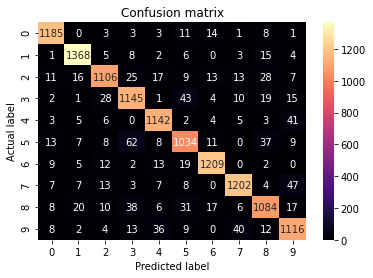

In [71]:
p = sns.heatmap(pd.DataFrame(cfm), annot=True, cmap="magma" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')